# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thunder bay
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | vitoria da conquista
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | petropavlovka
Processing Record 13 of Set 1 | kattivakkam
Processing Record 14 of Set 1 | pekanbaru
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | siaton
Processing Record 17 of Set 1 | ulsteinvik
Processing Record 18 of Set 1 | harper
Processing Record 19 of Set 1 | prieska
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | viqueque
Proc

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thunder bay,48.4001,-89.3168,273.14,51,0,1.54,CA,1711939294
1,saipan,15.1355,145.7010,302.54,1,75,9.77,MP,1711939461
2,punta arenas,-53.1500,-70.9167,277.21,93,75,3.60,CL,1711939369
3,invercargill,-46.4000,168.3500,287.05,75,97,2.24,NZ,1711939392
4,port-aux-francais,-49.3500,70.2167,278.00,76,100,9.87,TF,1711939461


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Converting Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thunder bay,48.4001,-89.3168,-0.01,51,0,1.54,CA,1711939294
1,saipan,15.1355,145.7010,29.39,1,75,9.77,MP,1711939461
2,punta arenas,-53.1500,-70.9167,4.06,93,75,3.60,CL,1711939369
3,invercargill,-46.4000,168.3500,13.90,75,97,2.24,NZ,1711939392
4,port-aux-francais,-49.3500,70.2167,4.85,76,100,9.87,TF,1711939461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

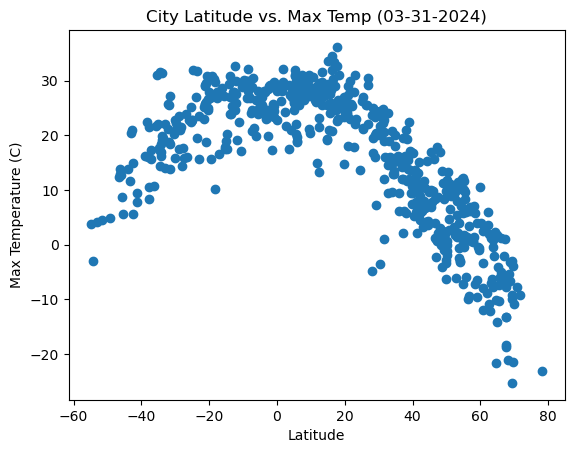

In [4]:
# Build scatter plot for latitude vs. temperature
# Getting the latitudes and max temperatures and assigning them to variables
city_lats = city_data_df['Lat']
city_max_temps = city_data_df['Max Temp']

# Creating Scatter Plot
plt.scatter(city_lats, city_max_temps)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temp (03-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

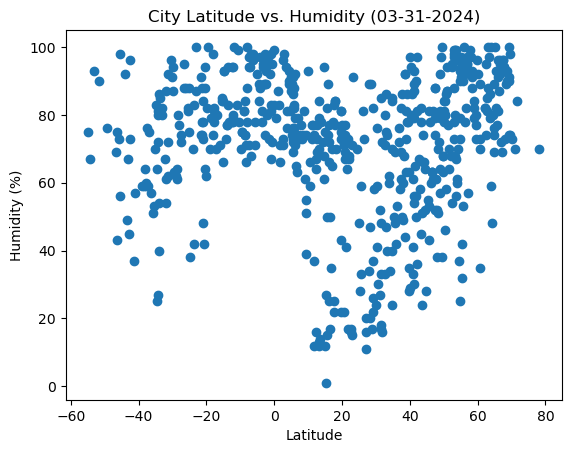

In [5]:
# Build scatter plot for latitude vs. temperature
# Getting the humidities and assigning them to a variable
city_humidity = city_data_df['Humidity']

# Creating Scatter Plot
plt.scatter(city_lats, city_humidity)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (03-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

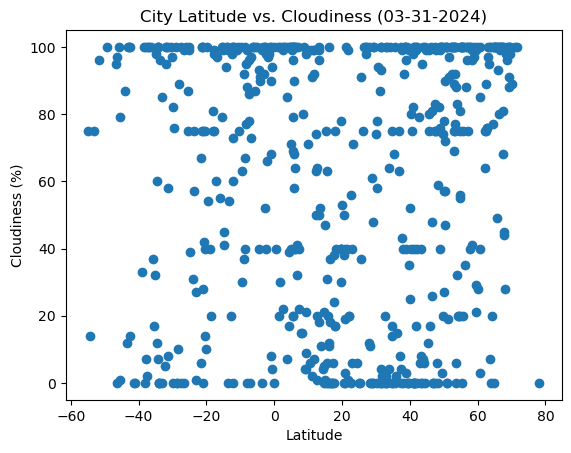

In [6]:
# Build scatter plot for latitude vs. temperature
# Getting the humidities and assigning them to a variable
city_cloud = city_data_df['Cloudiness']

# Creating Scatter Plot
plt.scatter(city_lats, city_cloud)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (03-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

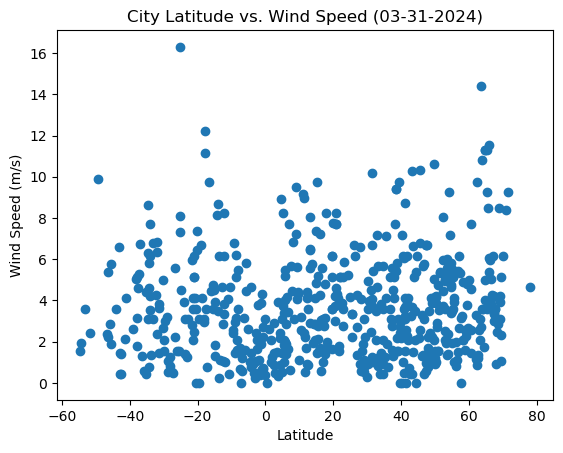

In [7]:
# Build scatter plot for latitude vs. temperature
# Getting the humidities and assigning them to a variable
city_wind = city_data_df['Wind Speed']

# Creating Scatter Plot
plt.scatter(city_lats, city_wind)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (03-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thunder bay,48.4001,-89.3168,-0.01,51,0,1.54,CA,1711939294
1,saipan,15.1355,145.7010,29.39,1,75,9.77,MP,1711939461
6,kodiak,57.7900,-152.4072,0.73,93,40,0.00,US,1711939296
8,isafjordur,66.0755,-23.1240,-5.04,81,100,11.56,IS,1711939462
9,qaqortoq,60.7167,-46.0333,-7.97,73,85,2.58,GL,1711939462


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,4.06,93,75,3.60,CL,1711939369
3,invercargill,-46.4000,168.3500,13.90,75,97,2.24,NZ,1711939392
4,port-aux-francais,-49.3500,70.2167,4.85,76,100,9.87,TF,1711939461
5,waitangi,-43.9535,-176.5597,13.79,92,87,3.58,NZ,1711939461
7,vitoria da conquista,-14.8661,-40.8394,20.32,93,45,1.86,BR,1711939441


###  Temperature vs. Latitude Linear Regression Plot

r-value = 0.895449238283081


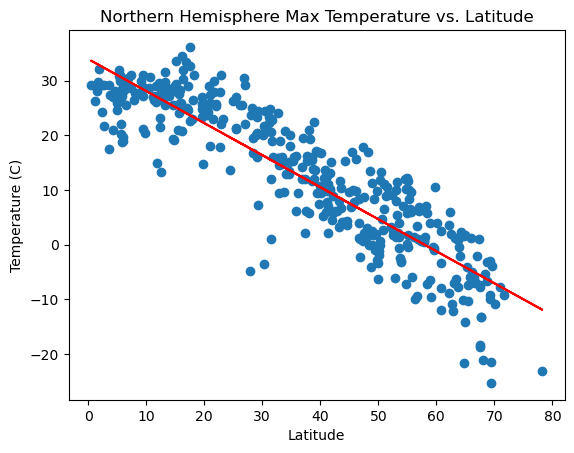

In [10]:
# Linear regression on Northern Hemisphere

# Getting the latitudes and temperatures in the northern hemisphere
northern_lat = northern_hemi_df['Lat']
northern_temps = northern_hemi_df['Max Temp']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temps)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(northern_lat, northern_temps)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(20,250),fontsize=15,color="red")

# Creating labels
plt.title('Northern Hemisphere Max Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Plotting
plt.show()

r-value = 0.6820479945722091


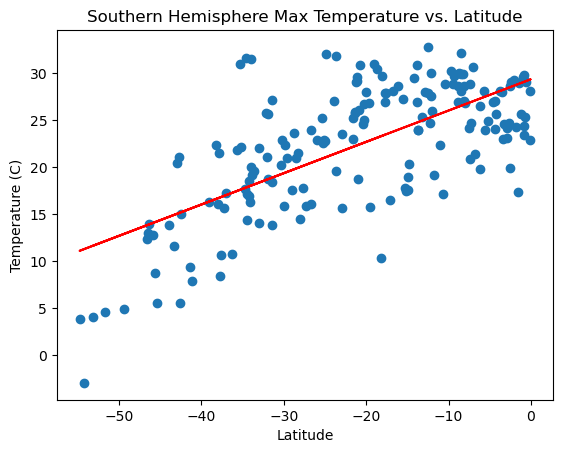

In [11]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_temps = southern_hemi_df['Max Temp']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temps)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(southern_lat, southern_temps)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")

# Creating labels
plt.title('Southern Hemisphere Max Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig6.png")

# Plotting
plt.show()

**Discussion about the linear relationship:** 
There is a positive correlation between Latitudes in the southern hemisphere and the Maximum Temperature. This suggests that as the latitude increases in the southern hemisphere, so does the max temperature. The correlation isn't the strongest so while there is a relationship between these variables, there could also be other factors involved. The northern hemisphere also has an r-value with high magnitude, but in the opposite direction. Therefore as latitude increases in the northern hemisphere, temperature declines. 

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.25526025134460606


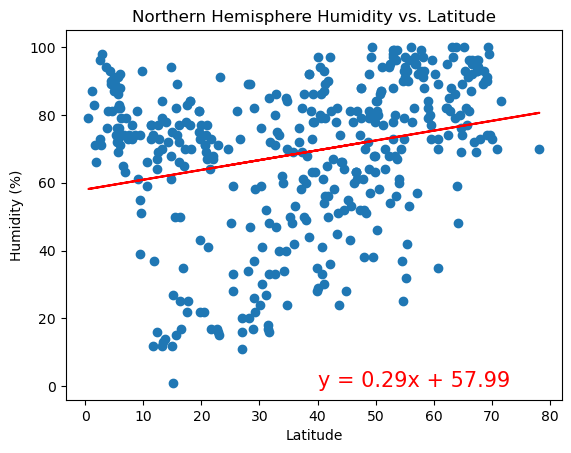

In [12]:
# Linear regression on Northern Hemisphere

# Getting the humidities in the northern hemisphere
northern_humidity = northern_hemi_df['Humidity']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(northern_lat, northern_humidity)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="red")

# Creating labels
plt.title('Northern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig7.png")

# Plotting
plt.show()

r-value = 0.42513039590131707


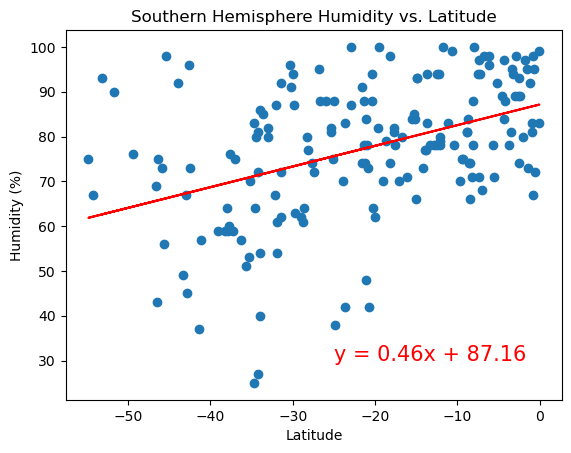

In [13]:
# Linear regression on Southern Hemisphere

# Getting the humidities in the southern hemisphere
southern_humidity = southern_hemi_df['Humidity']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(southern_lat, southern_humidity)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

# Creating labels
plt.title('Southern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig8.png")

# Plotting
plt.show()

**Discussion about the linear relationship:** 
There is a small positive correlation between Latitudes in the southern hemisphere and the Humidity. This suggests that as the latitude increases in the southern hemisphere, we see a slight increase in the humidity. The correlation isn't very strong though and it leads me to belive that there are definitely other factors that better explain the relationship. Due to the northern hemisphere being even smaller, I believe that there is less of a relationship between Latitude and Humidity in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.24569058176410968


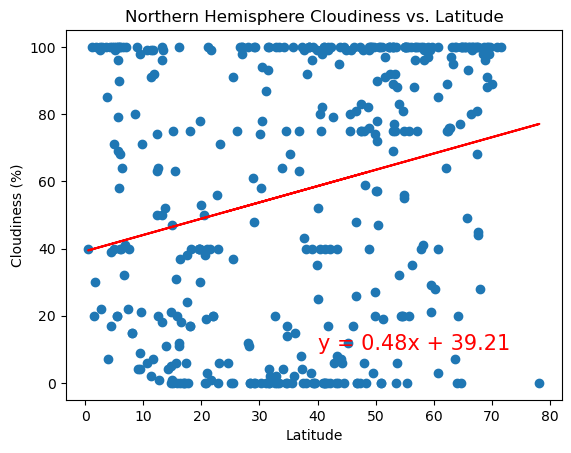

In [14]:
# Linear regression on Northern Hemisphere

# Getting the cloudiness in the northern hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(northern_lat, northern_cloudiness)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Creating labels
plt.title('Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig9.png")

# Plotting
plt.show()

r-value = 0.18505457851576676


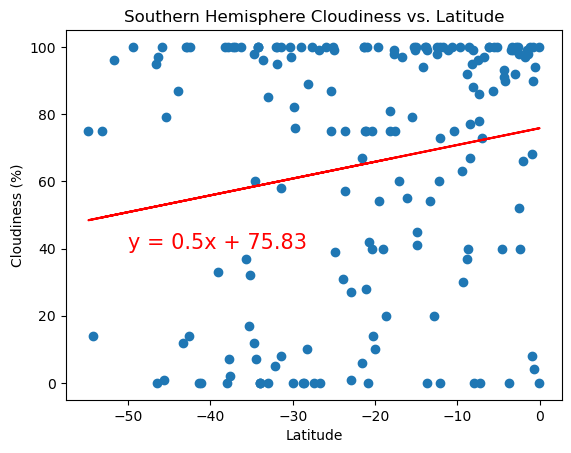

In [15]:
# Linear regression on Southern Hemisphere

# Getting the humidities in the southern hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(southern_lat, southern_cloudiness)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Creating labels
plt.title('Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig10.png")

# Plotting
plt.show()

**Discussion about the linear relationship:** 
While the r-value is positive, it is very small. This leads me to believe that there is no real correlation between the Latitude and the Cloudiness in the southern hemisphere. The northern hemisphere is slightly larger, but it is also too small for me to think there is a relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.13563804468061472


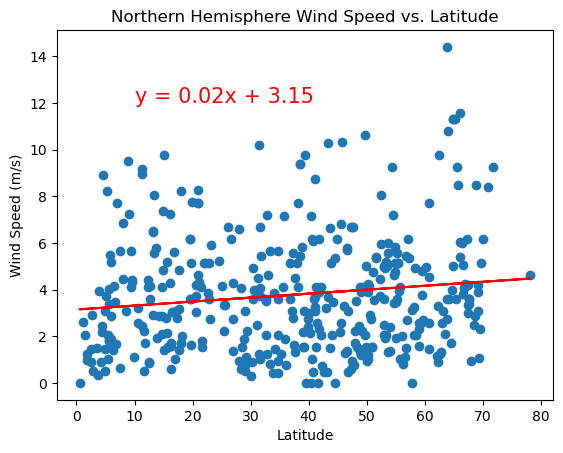

In [16]:
# Linear regression on Northern Hemisphere

# Getting the cloudiness in the northern hemisphere
northern_wind = northern_hemi_df['Wind Speed']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(northern_lat, northern_wind)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Creating labels
plt.title('Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig11.png")

# Plotting
plt.show()

r-value = 0.16357487638624016


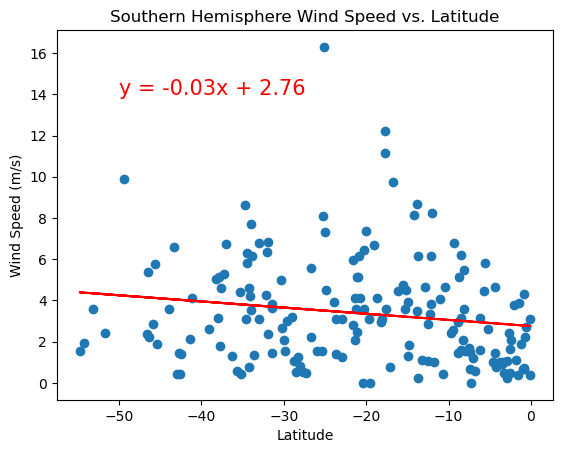

In [17]:
# Linear regression on Southern Hemisphere

# Getting the humidities in the southern hemisphere
southern_wind = southern_hemi_df['Wind Speed']


# Creating regression line and printing the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'r-value = {abs(rvalue)}')

# Creating Plots
plt.scatter(southern_lat, southern_wind)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,14),fontsize=15,color="red")

# Creating labels
plt.title('Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig12.png")

# Plotting
plt.show()

**Discussion about the linear relationship:** 
The magnitudes of the r-values for wind speeds is the lowest among the categories. Due to this small value I believe there is no correlation between the Latitude and Wind Speed in either hemisphere. 